In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
netflix = pd.read_csv("../data/netflix_titles (3).csv")

In [18]:
#netflix.head()
#netflix.dtypes
#netflix.describe()
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Nombre de valeurs manquantes par colonne :

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64

Nombre total de valeurs manquantes : 4307


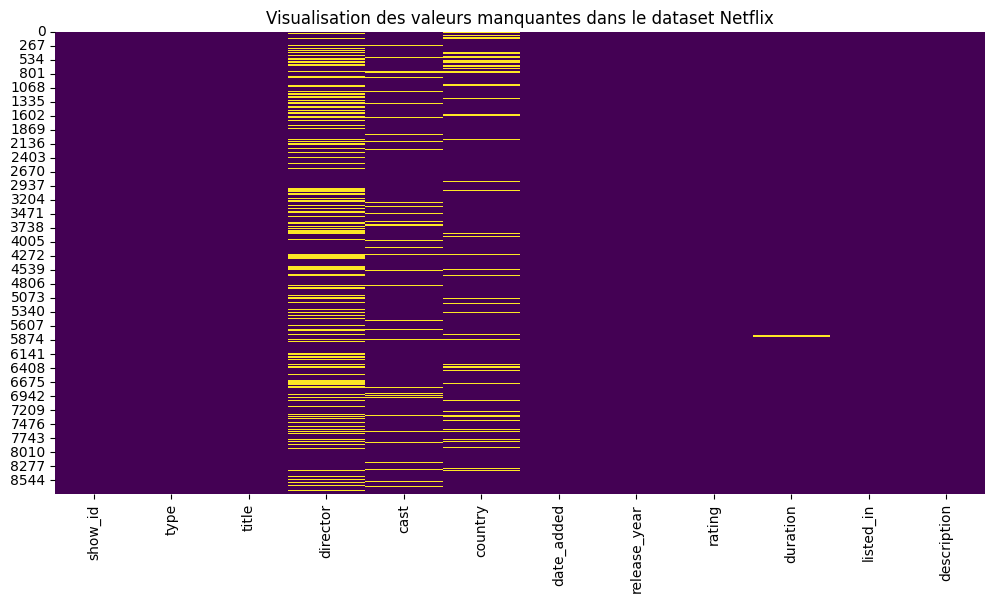

In [3]:
# Afficher le nombre de valeurs manquantes par colonne
def afficher_valeurs_manquantes(dataframe):
    valeurs_na = dataframe.isna().sum()
    print("Nombre de valeurs manquantes par colonne :\n")
    print(valeurs_na[valeurs_na > 0])  # n'affiche que les colonnes avec des valeurs manquantes
    print("\nNombre total de valeurs manquantes :", valeurs_na.sum())

# Appel de la fonction
afficher_valeurs_manquantes(netflix)
netflix.shape

# Représentation valeur manquantes
plt.figure(figsize=(12,6))
sns.heatmap(netflix.isna(), cbar=False, cmap='viridis')
plt.title("Visualisation des valeurs manquantes dans le dataset Netflix")
plt.show()

<Axes: >

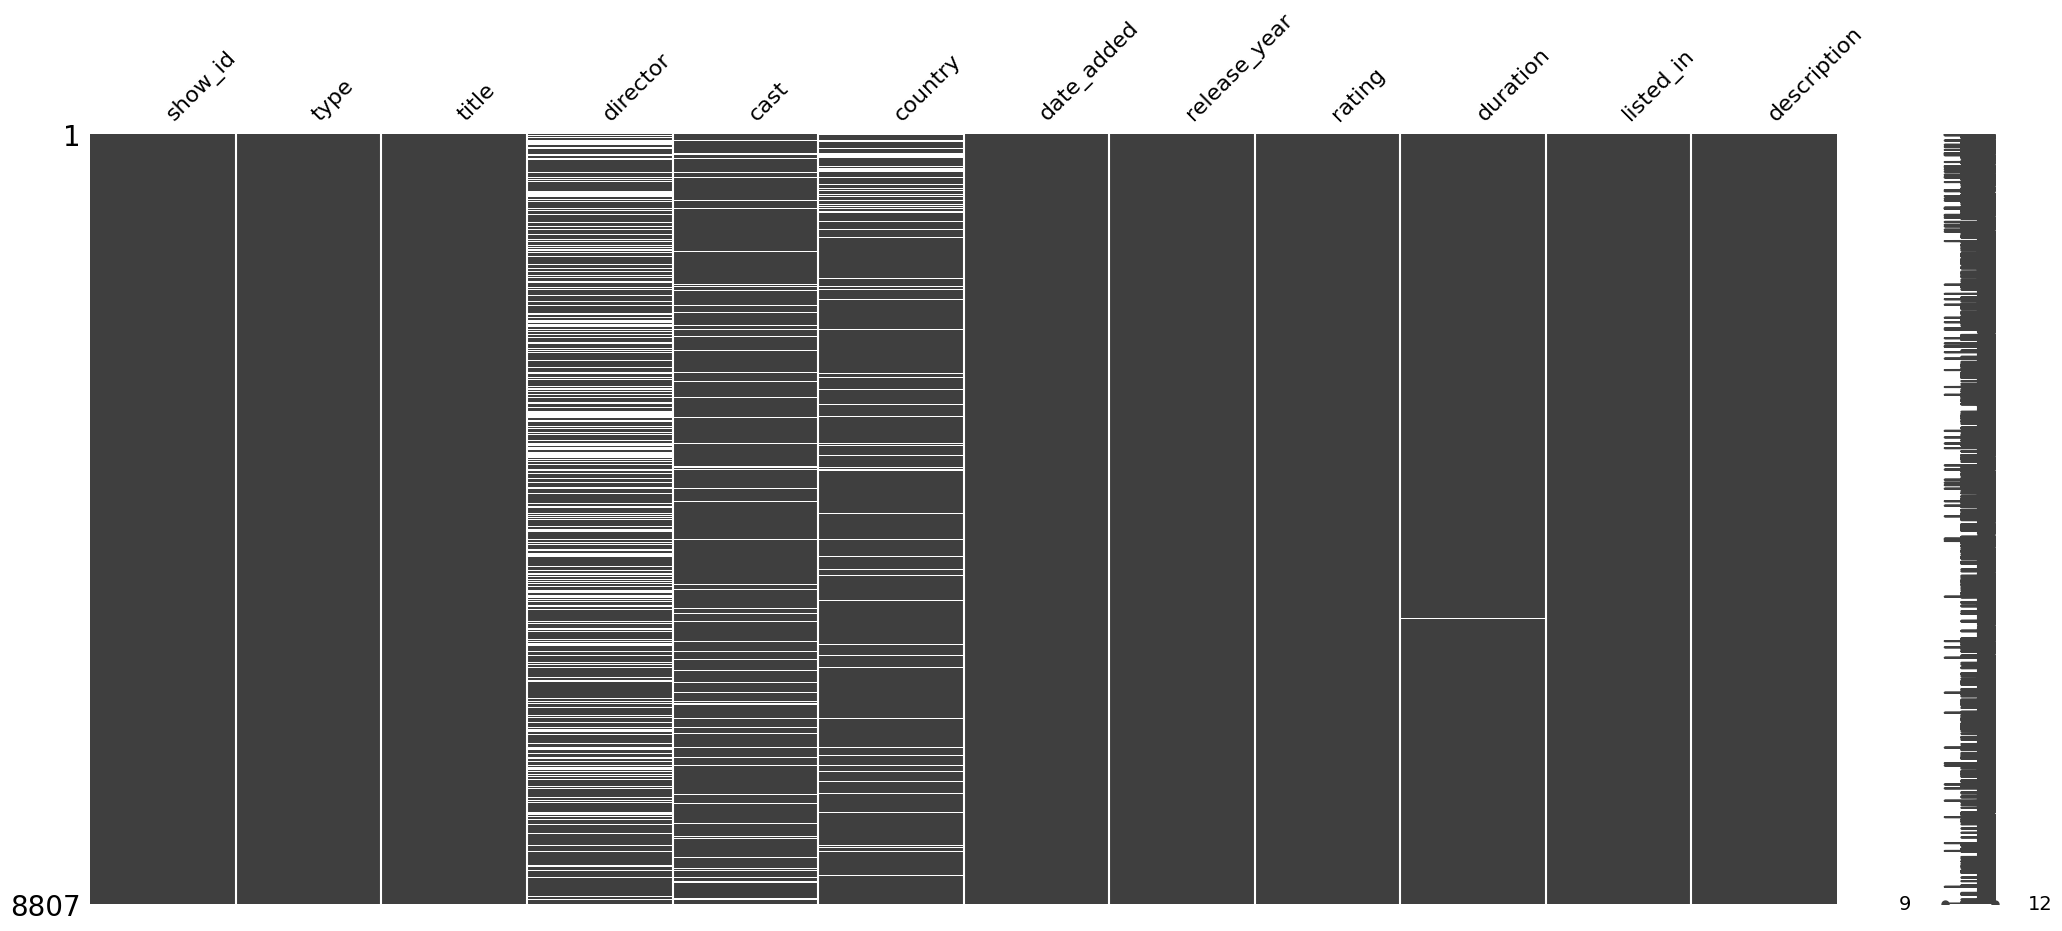

In [4]:
msno.matrix(netflix)

In [5]:
# 1) Drop show_id et drop date_added
netflix_cleaned=netflix.drop(["show_id","date_added"], axis=1)

In [6]:
netflix_cleaned.isnull().mean()*100

type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [7]:
netflix_cleaned=netflix_cleaned.dropna(subset=['rating','duration'])

In [8]:
netflix_cleaned.isnull().mean()*100

type             0.000000
title            0.000000
director        29.897727
cast             9.375000
country          9.431818
release_year     0.000000
rating           0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

NameError: name 'df' is not defined

In [9]:
netflix_cleaned['director'] = netflix_cleaned['director'].fillna('No Director registered')
netflix_cleaned['cast'] = netflix_cleaned['cast'].fillna('No Cast registered')
netflix_cleaned['country'] = netflix_cleaned['country'].fillna('No Country registered')

In [10]:
netflix_cleaned.isnull().mean()*100

type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [11]:
netflix_cleaned

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast registered,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,No Director registered,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country registered,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,No Director registered,No Cast registered,No Country registered,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,No Director registered,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,No Director registered,No Cast registered,No Country registered,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [14]:
netflix_cleaned['type'].nunique()
netflix_cleaned['director'].unique()
#netflix_cleaned['country'].nunique()
netflix_cleaned.groupby('director').count().sort_values(by='title',ascending=False)
netflix_cleaned['release_year'].nunique()

74

In [16]:
netflix_cleaned['rating'].nunique()

14